## Python statistics essential training - 04_06_challenge

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

# Challenge

Using bootstrapping on a polling data for Mayor Green's grades, estimate the confidence interval for the fraction of citizens that give her a passing grade: defined as more than five

## Using solution's approach

In [4]:
pop = pd.read_csv('../04_03/grades.csv')

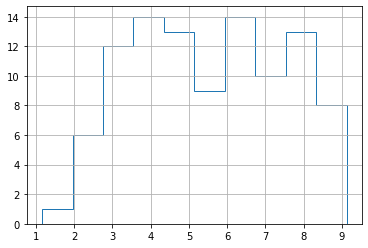

In [5]:
_ = pop.grade.hist(histtype='step')

In [6]:
scipy.stats.percentileofscore(pop.grade, 5)

43.0

In [7]:
pop.sample(100, replace=True).grade

79    5.186680
57    3.784574
83    8.351605
58    3.536306
66    2.795256
        ...   
20    3.036285
26    4.446377
45    3.525235
63    7.687033
9     5.754509
Name: grade, Length: 100, dtype: float64

`scipy.stats.percentileofscore` returns the percentile rank of a score relative to a list of scores. A `percentileofscore` of, for example, 80% means that 80% of the scores in `a` (a list of scores) are below the given score.

Since we are interested in the approval rating, we want the percent of the sample that is above (more than) the given score (5), thus we get the complement of the `percentileofscore` with : 100 - `percentileofscore`

In [8]:
bootstrap = pd.DataFrame({'passing': (100 - scipy.stats.percentileofscore(pop.sample(100, replace=True).grade, 5)
                           for i in range(1000))})

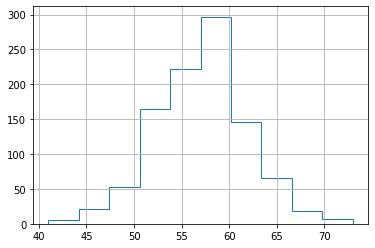

In [9]:
_ = bootstrap.passing.hist(histtype='step')

In [10]:
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(47.0, 67.0)

## Using approach from CI lesson

In [12]:
sum(pop.grade > 5) / len(pop)

0.57

In [13]:
def sample(approval_rating, n=100):
    return pd.DataFrame({'rating': np.where(np.random.rand(n) < approval_rating, 'Pass', 'Fail')})

In [14]:
s = sample(0.57, 100)

In [15]:
s.rating.value_counts(normalize=True)

Pass    0.6
Fail    0.4
Name: rating, dtype: float64

In [16]:
def samplingdist(approval_rating, n=100):
    return pd.DataFrame((sample(approval_rating, n).rating.value_counts(normalize=True) for i in range(1000)))

In [17]:
def quantiles(approval_rating, n=100):
    dist = samplingdist(approval_rating, n)
    return dist.Pass.quantile(0.025), dist.Pass.quantile(0.975)

In [18]:
quantiles(0.47)

(0.38, 0.57)

In [19]:
quantiles(0.66)

(0.56975, 0.75)

The confidence interval is [0.47, 0.66] at a 95% confidence interval.